# 1. 라이브러리 및 데이터 세팅

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("data/train.csv")
test  = pd.read_csv("data/test.csv")
len(train), len(test)

(891, 418)

In [3]:
# all_df = pd.concat([train, test])
# all_df

In [4]:
all_df = pd.concat([train, test]).reset_index(drop=True)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# 2. Cleansing
현재 단계에서 4가지의 cleansing을 합니다. <br> 
1) 이상한 값과 이상치 처리 <br>
2) 결측치 처리 <br>
3) 분석을 위한 새로운 feature 생성 <br>
4) 변수 타입 변경


In [5]:
# 이상한 값 = 터무늬없는 값
# 이상치 = ml운 데이터의 분포를 확인하고 공부하는데 이상치의 값으로 혼돈을 맞이함 = 이상치값으로 인해서 다른 결과를 예측하게됨.

In [6]:
print('Train columns with null values:\n', train.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', test.isnull().sum())
print("-"*10)

train.describe(include = 'all')
# describe 연속형 자료만 나옴 
# include = 'all' = drop된 자료도 모두 보여줌

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Moran, Miss. Bertha",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
# age 열의 결측치를 median으로 채웁니다.
# embarked 열의 결측치를 최빈값으로 채웁니다.
# fare 열의 결측치를 median으로 채웁니다.
all_df["Age"]      = all_df['Age'].fillna(all_df['Age'].median())
all_df['Embarked'] = all_df['Embarked'].fillna(all_df['Embarked'].mode()[0])
all_df['Fare']     = all_df['Fare'].fillna(all_df['Fare'].median())

In [8]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [9]:
drop_column = ['PassengerId','Cabin', 'Ticket']
all_df = all_df.drop(drop_column, axis=1)
# axis 축 ---> axis = 0 low, axis = 1 columns

all_df.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [10]:
all_df['FamilySize'] = all_df['SibSp'] + all_df['Parch'] + 1
# +1 자기 자신
# IsAlone 열 생성(혼자 승선 여부)
all_df['IsAlone'] = 1 #initialize to yes/1 is alone
all_df['IsAlone'].loc[all_df['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

# Title(Mr, Ms, …) 열 생성
all_df['Title'] = all_df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

# qcut: 빈도수가 비슷하도록 자릅니다.
all_df['FareBin'] = pd.qcut(all_df['Fare'], 4)

# cut: 구간의 크기로 자릅니다.
all_df['AgeBin'] = pd.cut(all_df['Age'].astype(int), 5)

C:\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
#cleanup rare title names
#print(data1['Title'].value_counts())
stat_min = 10 #while small is arbitrary, we'll use the common minimum in
title_names = (all_df['Title'].value_counts() < stat_min) #this will create a true false series with title name as index
# value_counts 한 결과가 T or F로 저장이 된다.

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
all_df['Title'] = all_df['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
# title_names에서 t인 사람들을 MIsc 로 반환해준다.
print(all_df['Title'].value_counts())
print("-"*10)

#preview data again
all_df.info()
all_df.info()
all_df.sample(10)

Mr        757
Miss      260
Mrs       197
Master     61
Misc       34
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    float64 
 1   Pclass      1309 non-null   int64   
 2   Name        1309 non-null   object  
 3   Sex         1309 non-null   object  
 4   Age         1309 non-null   float64 
 5   SibSp       1309 non-null   int64   
 6   Parch       1309 non-null   int64   
 7   Fare        1309 non-null   float64 
 8   Embarked    1309 non-null   object  
 9   FamilySize  1309 non-null   int64   
 10  IsAlone     1309 non-null   int64   
 11  Title       1309 non-null   object  
 12  FareBin     1309 non-null   category
 13  AgeBin      1309 non-null   category
dtypes: category(2), float64(3), int64(5), object(4)
memory usage: 125.9+ KB
<class 'pandas.core.frame.DataFrame'>

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
40,0.0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,9.4750,S,2,0,Mrs,"(7.896, 14.454]","(32.0, 48.0]"
519,0.0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.896]","(16.0, 32.0]"
1026,NaN,3,"Carlsson, Mr. Carl Robert",male,24.0,0,0,7.8542,S,1,1,Mr,"(-0.001, 7.896]","(16.0, 32.0]"
58,1.0,2,"West, Miss. Constance Mirium",female,5.0,1,2,27.7500,S,4,0,Miss,"(14.454, 31.275]","(-0.08, 16.0]"
172,1.0,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,11.1333,S,3,0,Miss,"(7.896, 14.454]","(-0.08, 16.0]"
466,0.0,2,"Campbell, Mr. William",male,28.0,0,0,0.0000,S,1,1,Mr,"(-0.001, 7.896]","(16.0, 32.0]"
244,0.0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,7.2250,C,1,1,Mr,"(-0.001, 7.896]","(16.0, 32.0]"
837,0.0,3,"Sirota, Mr. Maurice",male,28.0,0,0,8.0500,S,1,1,Mr,"(7.896, 14.454]","(16.0, 32.0]"
616,0.0,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,14.4000,S,3,0,Mr,"(7.896, 14.454]","(32.0, 48.0]"
628,0.0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.896]","(16.0, 32.0]"


In [14]:
# CONVERT: convert objects to category using Label Encoder for all_df
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 인코딩의 대표적인 예 : labe encoding one_hot encoding pd.get_dummies
# 우리가 사용할 인코딩 one_hot encoding = 머신러닝에서 유용함

# code categorical data
label, ohe = LabelEncoder(), OneHotEncoder()
obj_cols   = ["Sex", "Embarked", "Title"]

# label encoding
all_df['Sex_Code']      = label.fit_transform(all_df['Sex'])
all_df['Embarked_Code'] = label.fit_transform(all_df['Embarked'])
all_df['Title_Code']    = label.fit_transform(all_df['Title'])
all_df['AgeBin_Code']   = label.fit_transform(all_df['AgeBin'])
all_df['FareBin_Code']  = label.fit_transform(all_df['FareBin'])

# one hot encoding
ohe.fit(all_df[obj_cols])
ohe_cols = []
for cat_cols in ohe.categories_:
    for col in cat_cols:
        ohe_cols.append(col)

ohe_df = pd.DataFrame(ohe.transform(all_df[obj_cols]).toarray(), columns=ohe_cols)
all_df = pd.concat([all_df, ohe_df], axis=1)

In [15]:
print(all_df.isnull().sum())
print("-"*20)
print(all_df.info())
all_df.describe(include='all')

Survived         418
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
FamilySize         0
IsAlone            0
Title              0
FareBin            0
AgeBin             0
Sex_Code           0
Embarked_Code      0
Title_Code         0
AgeBin_Code        0
FareBin_Code       0
female             0
male               0
C                  0
Q                  0
S                  0
Master             0
Misc               0
Miss               0
Mr                 0
Mrs                0
female             0
male               0
C                  0
Q                  0
S                  0
Master             0
Misc               0
Miss               0
Mr                 0
Mrs                0
dtype: int64
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtyp

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,...,female,male,C,Q,S,Master,Misc,Miss,Mr,Mrs
count,891.000000,1309.000000,1309,1309,1309.000000,1309.000000,1309.000000,1309.000000,1309,1309.000000,...,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
unique,NaN,NaN,1307,2,NaN,NaN,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,NaN,S,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,843,NaN,NaN,NaN,NaN,916,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.383838,2.294882,NaN,NaN,29.503186,0.498854,0.385027,33.281086,NaN,1.883881,...,0.355997,0.644003,0.206264,0.093965,0.699771,0.046600,0.025974,0.198625,0.578304,0.150497
std,0.486592,0.837836,NaN,NaN,12.905241,1.041658,0.865560,51.741500,NaN,1.583639,...,0.478997,0.478997,0.404777,0.291891,0.458533,0.210862,0.159119,0.399117,0.494019,0.357694
min,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,0.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,7.895800,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.275000,NaN,2.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [16]:
#define x variables for original features aka feature selection
all_df_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']

#coded for algorithm calculation
all_df_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare']

#define x variables for original w/bin features to remove continuous variables
all_df_x_bin  = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']

# Machine Learning 진행시 크게 3가지의 Data로 분류함
# 1. train - ML의 학습용 데이터
# 2. validation - 모델의 성능 및 평가용 데이터
# 3. test - 최종 모델의 점수 평가용 데이터
# 주로 train data로 학습 이후 validation data 로 평가를 반복 진행함.
# validation dat를 사용하는 이유 = 과적합(Overfiting)
# Overfiting - 학슴용 데이터로 반복하여 학슴하게 될 경우, 새로운 데이터에 대하여 유연하게 예측하지 못하게 되는 경우가 발생

In [17]:
target = "Survived"
for x in all_df_x:
    if all_df[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(all_df[[x, target]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        
print(pd.crosstab(all_df['Title'],
                  all_df[target]),)

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
7      9       NaN
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0      

# 3. EDA(Visualization)

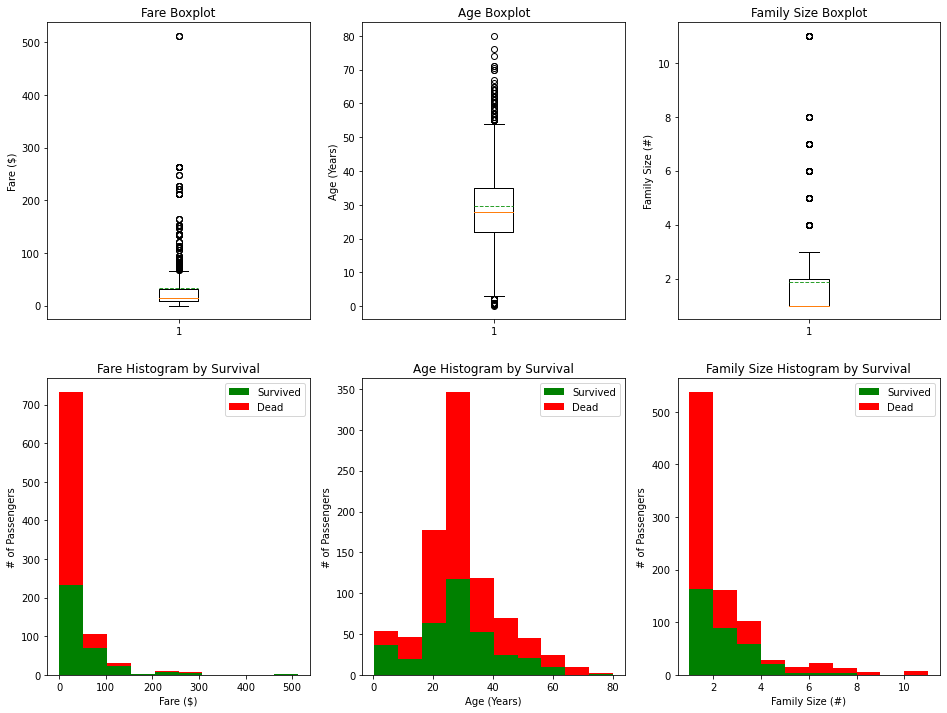

In [18]:
plt.figure(figsize=[16,12])

plt.subplot(2, 3, 1)
plt.boxplot(x=all_df['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(2, 3, 2)
plt.boxplot(all_df['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(2, 3, 3)
plt.boxplot(all_df['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(2, 3, 4)
plt.hist(x = [all_df[all_df['Survived']==1]['Fare'], all_df[all_df['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
# stacked = 그래프 위에 그래프를 얹는다. 먼저 들어가는것을 survived = 1 이후 = 0 인 사람들
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(2, 3, 5)
plt.hist(x = [all_df[all_df['Survived']==1]['Age'], all_df[all_df['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(2, 3, 6)
plt.hist(x = [all_df[all_df['Survived']==1]['FamilySize'], all_df[all_df['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

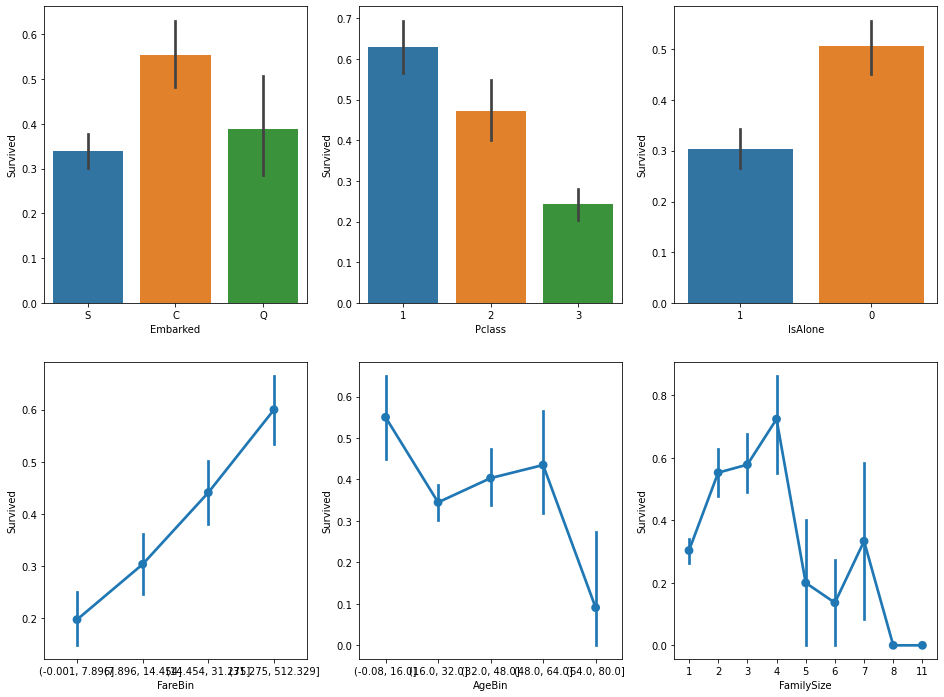

In [19]:
#we will use seaborn graphics for multi-variable comparison: https://seaborn.pydata.org/api.html

#graph individual features by survival
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=all_df, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=all_df, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=all_df, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived',  data=all_df, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=all_df, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=all_df, ax = saxis[1,2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

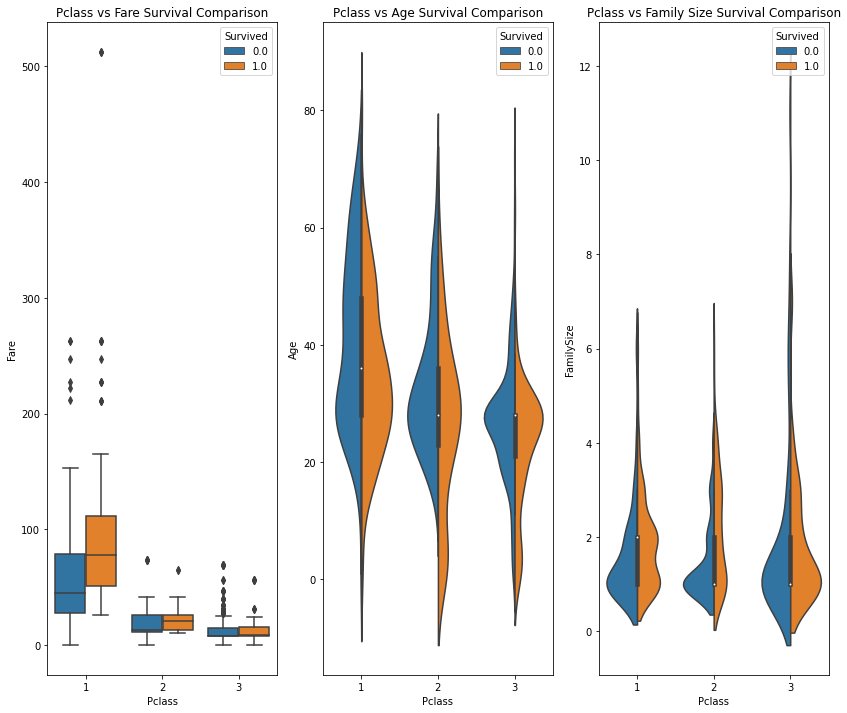

In [20]:
# 이중 for문을 활용하여 그래프 표현하기
# fig, saxis = plt.subplots(2, 3,figsize=(16,12))


# check_col = ["Embarked", "Pclass", "IsAlone", 
#              "FareBin", "AgeBin", "FamilySize"]

# i = 0
# for axes in saxis:
#     for ax in axes:
#         col = check_col[i]
#         if i < 3:            
#             sns.barplot(x=col, y='Survived', data=all_df, ax=ax)
#         else:
#             sns.pointplot(x=col, y='Survived', data=all_df, ax=ax)
#         i += 1

# 양적 데이터의 분포그래프: Pclass
# Pclass 변수가 생사여부에 영향을 미친다는 것을 알고 있습니다.
# 따라서, Pclass와 두 번째 feature를 비교해보겠습니다.
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=all_df, ax=axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=all_df, split=True, ax=axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.violinplot(x='Pclass', y='FamilySize', hue='Survived', data=all_df, split=True, ax=axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

In [21]:
# Pclass 별 FamilySize 의 평균
all_df.groupby('Pclass')['FamilySize'].mean()

# groupby 사용에 관하여 공부하기
all_df[all_df["FamilySize"] >= 4].groupby("Pclass")["Name"].count()

Pclass
1    20
2    22
3    83
Name: Name, dtype: int64

In [22]:
for i in sorted(all_df['FamilySize'].unique()):
    print('FamilySize:', i)
    print(all_df[all_df["FamilySize"] == i].groupby("Pclass")["Name"].count())
    print('-'*10,'\n')

FamilySize: 1
Pclass
1    160
2    158
3    472
Name: Name, dtype: int64
---------- 

FamilySize: 2
Pclass
1    104
2     52
3     79
Name: Name, dtype: int64
---------- 

FamilySize: 3
Pclass
1    39
2    45
3    75
Name: Name, dtype: int64
---------- 

FamilySize: 4
Pclass
1     9
2    20
3    14
Name: Name, dtype: int64
---------- 

FamilySize: 5
Pclass
1     5
2     1
3    16
Name: Name, dtype: int64
---------- 

FamilySize: 6
Pclass
1     6
2     1
3    18
Name: Name, dtype: int64
---------- 

FamilySize: 7
Pclass
3    16
Name: Name, dtype: int64
---------- 

FamilySize: 8
Pclass
3    8
Name: Name, dtype: int64
---------- 

FamilySize: 11
Pclass
3    11
Name: Name, dtype: int64
---------- 



<AxesSubplot:xlabel='FamilySize', ylabel='count'>

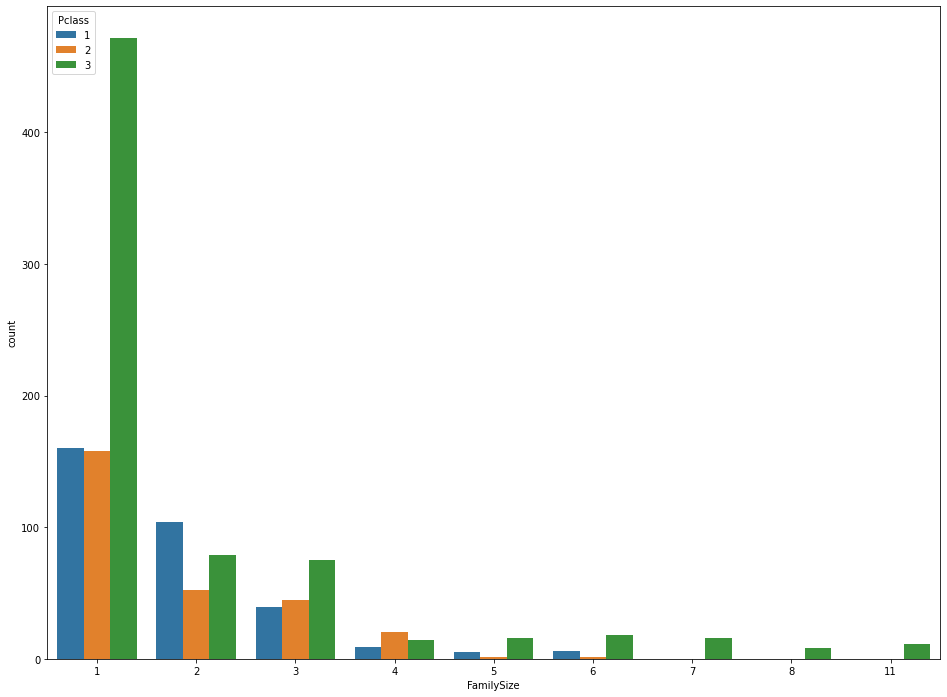

In [23]:
# countplot - y축을 따로 지정하지 않는다.

plt.figure(figsize=(16, 12))
sns.countplot(data=all_df, x="FamilySize", hue="Pclass")

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

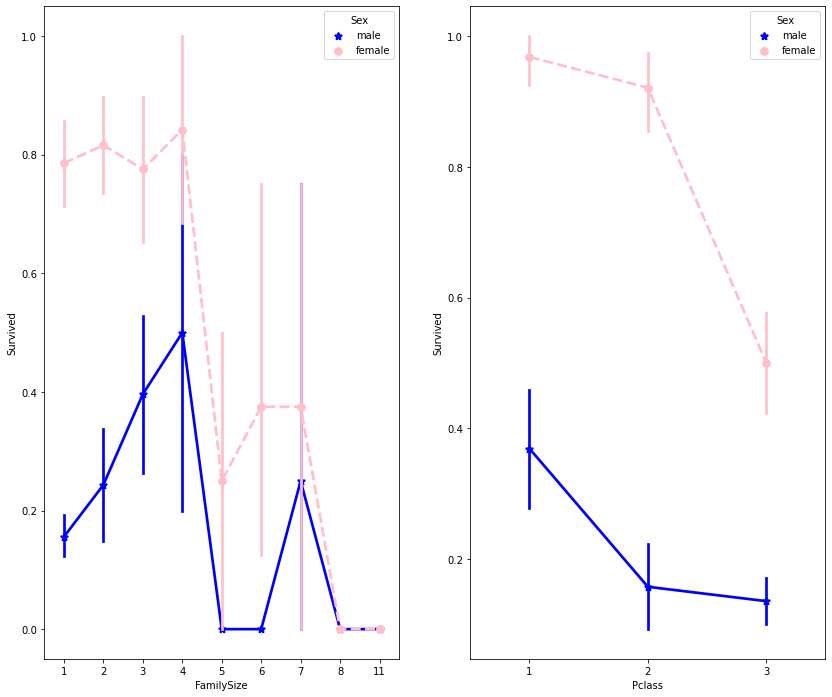

In [25]:
# pointplat - scatterplot의 중심경향성을 띄는 점을 찍은 뒤, 유의수준을 나타낸다.
# scatterplot - 각각의 데이터를 x,y의 형태로 점을 찍어 그래프화 시킨다.

# 함수에 커서를 올리고 shift + tab = 작성한 함수의 간략한 설명을 볼 수 있음.

#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=all_df,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=all_df,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

C:\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\anaconda3\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


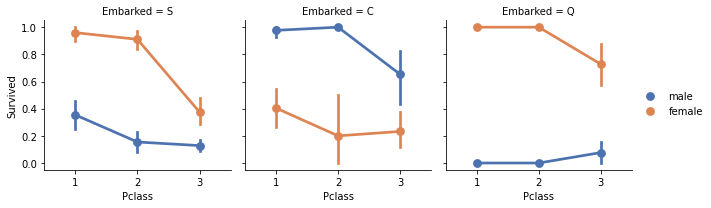

In [26]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
# 위 사이트는 FacetGrid 듀토리얼 
# FacetGrid - 다중 그래프를 한번에 만들어준다.
# legend - 범례

#how does embark port factor with class, sex, and survival compare
e = sns.FacetGrid(all_df, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

In [27]:
# 승선항 c의 경우 s와 q의 결과와 반대로 남성의 생존률이 더 높게 나타남.

all_df.groupby(["Embarked", "Sex"])["Name"].count()

Embarked  Sex   
C         female    113
          male      157
Q         female     60
          male       63
S         female    293
          male      623
Name: Name, dtype: int64

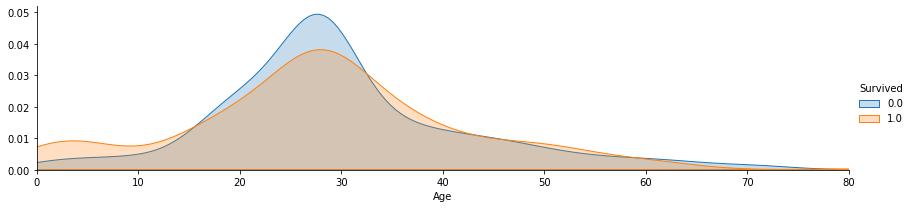

In [28]:
# kdeplot - 히스토그램보다 그래프의 형태를 부드럽게 만들어주는 그래프.

#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid(all_df, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , all_df['Age'].max()))
a.add_legend()

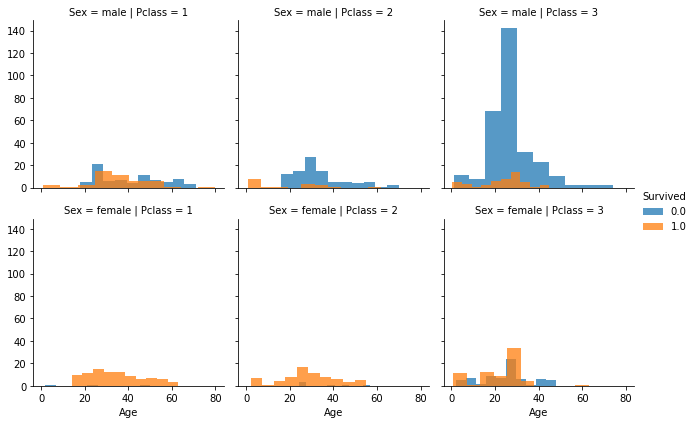

In [29]:
# histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(all_df, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

# Sex = ['male','female'] - row = 2
# Pclass = [1,2,3] - col = 3

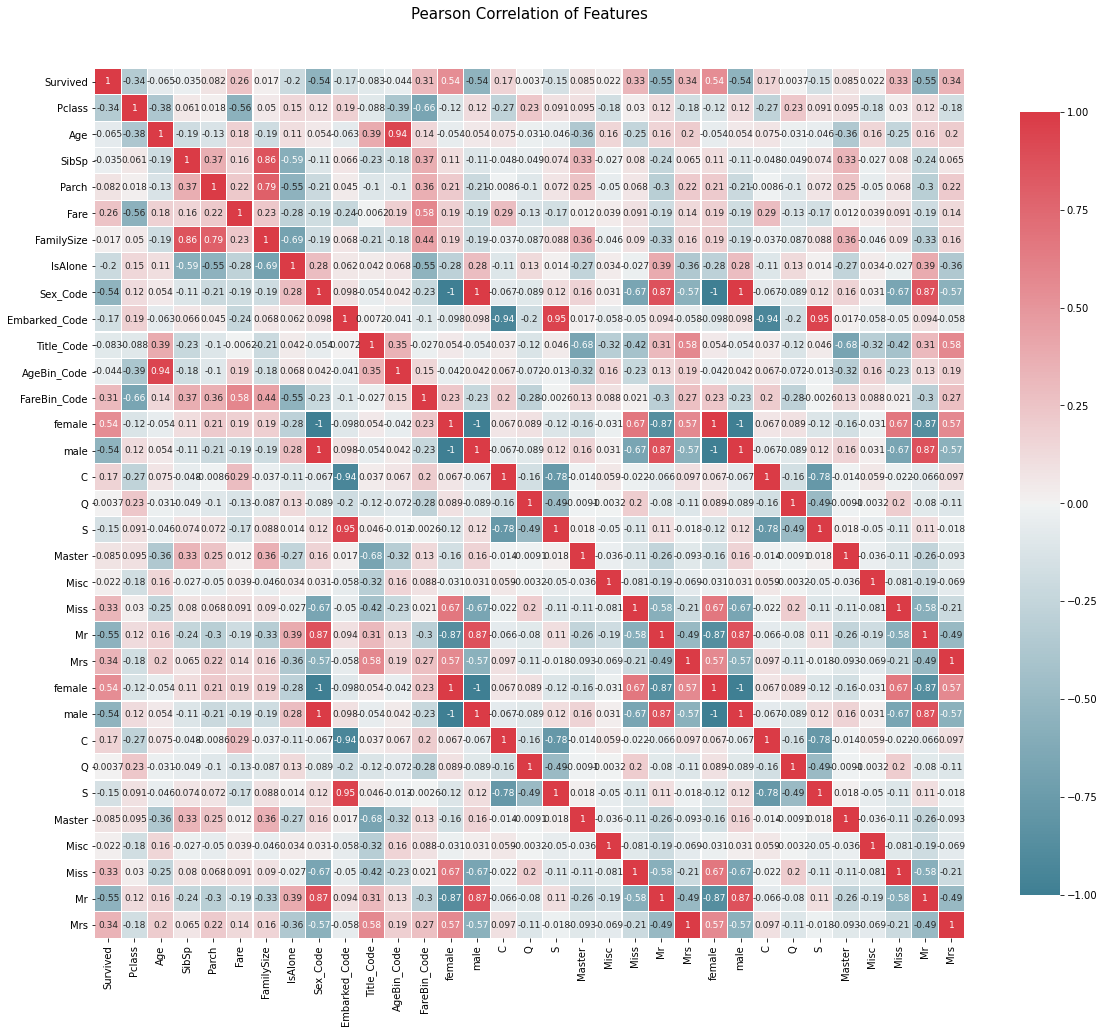

In [34]:
#pair plots of entire dataset
# pp = sns.pairplot(all_df, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
# pp.set(xticklabels=[])

#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(20, 16))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize': 9 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(all_df)

# Mr의 경우 Survived와의 correlation이 -.055로 상당히 높게 나타난 것을 확인할 수 있음.
# 이전 Title을 분리 했을 때 보다 더욱 높은 수치를 보여줌.
# one_hot_encoding을 통해 새로운 벡터를 만들어 내고 이를 통해서 해당 변수의 영향력을 증가시킨 것이다.
# lable encoding의 경우 같은 벡터 내에서의 평균값을 통해서 결과를 예측하기 때문에 상대적으로 영향력이 적었음.

# 4. 모델링(Modeling)

In [35]:
# 임시 저장
temp_df = all_df[::]

# 복구
# all_df = temp_df[::]

In [36]:
all_df = all_df.drop(obj_cols + ["Name", "FareBin", "AgeBin"], axis=1)
train = all_df.loc[:890, :]
test  = all_df.loc[891:, :].reset_index(drop=True)
len(train), len(test)

(891, 418)

In [37]:
# rfc와 logistic 2가지의 예측 프로그램을 활용하여 진행

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
rfc = RandomForestClassifier(n_jobs=-1)

# 학습
logr.fit(train.drop([target], axis=1),train[target])
rfc.fit(train.drop([target], axis=1),train[target])


# 예측
logr_pred = logr.predict(test.drop([target], axis=1))
rfc_pred = rfc.predict(test.drop([target], axis=1))

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
sub = pd.read_csv("data/gender_submission.csv")
sub.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [39]:
sub["Survived"] = logr_pred[:]
sub["Survived"] = sub["Survived"].astype(int)

sub.to_csv("sub/logr1.csv", index=0)

sub["Survived"] = rfc_pred[:]
sub["Survived"] = sub["Survived"].astype(int)

sub.to_csv("sub/rfc1.csv", index=0)

In [ ]:
# logistic을 활용했을때 score = 0.76으로 약 0.07%정도 올라간 것을 확인할 수 있었다.
# 이렇게 기본적인 modeling 한것을 'baseline' 맞췄다 라고 표현
# 이후 modeling의 점수를 올리기 위해
# 1. Feature engineering 